# **Титульный лист**

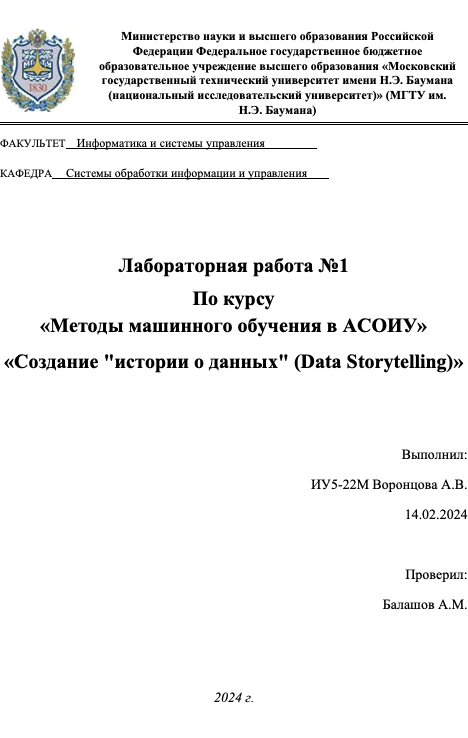

# **Лабораторная работа №1. Создание "истории о данных" (Data Storytelling)**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv('housing.csv', encoding='windows-1251')

Рассмотрим используемый dataset и найдем подходящее решение по методологии data-to-viz

In [ ]:
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Параметр total_bedrooms показывает общую площадь спальных комнат. Нулевые значения могут исказить статистические показатели, такие как среднее значение или стандартное отклонение. Это может повлиять на результаты анализа данных, поэтому мы их удалим.

In [ ]:
data.dropna(inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Наш набор упорядочен и содержит множество столбцов, но не все числовые. Переведем категориальный признак в числовой для дальнейшей работы. Для перевода категориального признака "ocean_proximity" в числовой формат с помощью библиотеки NumPy, можно воспользоваться функцией np.unique() для создания уникального списка значений категориального признака и функцией np.searchsorted() для присвоения числовых индексов этим значениям.

In [ ]:
ocean_proximity_values = np.unique(data['ocean_proximity'])
ocean_proximity_values

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [ ]:
# # Создание словаря соответствия значений категориального признака числовым индексам
# ocean_proximity_dict = {value: index for index, value in enumerate('ocean_proximity_values')}

# # Преобразование категориального признака в числовой формат
# data['ocean_proximity_numeric'] = data['ocean_proximity'].map(ocean_proximity_dict)
# data = data.drop('ocean_proximity', axis=1)
# data.info()

data_encoded = pd.get_dummies(data['ocean_proximity'], prefix='ocean_proximity')

# Объединяем закодированные столбцы с исходным DataFrame
data = pd.concat([data, data_encoded], axis=1)

# Удаляем исходный категориальный столбец
data.drop('ocean_proximity', axis=1, inplace=True)


In [ ]:
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


**Распределение стоимости жилья:**

*   Построим гистограмму и ящик с усами для признака "median_house_value" и проанализируем распределение стоимости жилья в датасете.
*   Выявим выбросы и аномалии в данных



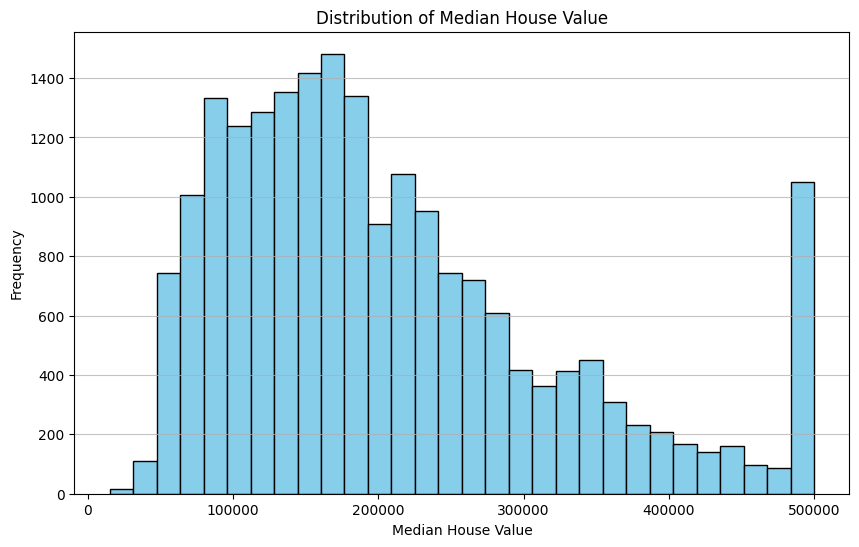

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['median_house_value'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value')
plt.grid(axis='y', alpha=0.75)
plt.show()

Ось X обозначает медианную стоимость домов, а ось Y показывает частоту, с которой данные значения встречаются в наборе данных.

Из гистограммы можно сделать несколько выводов:

Большинство стоимостей домов находится в диапазоне примерно от 100,000 до 300,000 долларов. У этой части гистограммы самая высокая частота, что указывает на то, что это самый обычный диапазон стоимости домов в анализируемом наборе данных.

Распределение стоимостей домов имеет длинный "хвост" в сторону более высоких значений. Количество домов со стоимостью выше 300,000 долларов уменьшается, но продолжает существовать значимое количество домов стоимостью до 500,000 долларов.

Гистограмма асимметричная, распределение не является нормальным (скошенным вправо), то есть медианные значения стоимостей домов склонны к уменьшению частоты с увеличением стоимости.

В целом, гистограмма помогает понять общую структуру рынка недвижимости в контексте срединных стоимостей домов, показывая, что более доступные дома являются более обычными, в то время как очень дорогие дома встречаются реже.

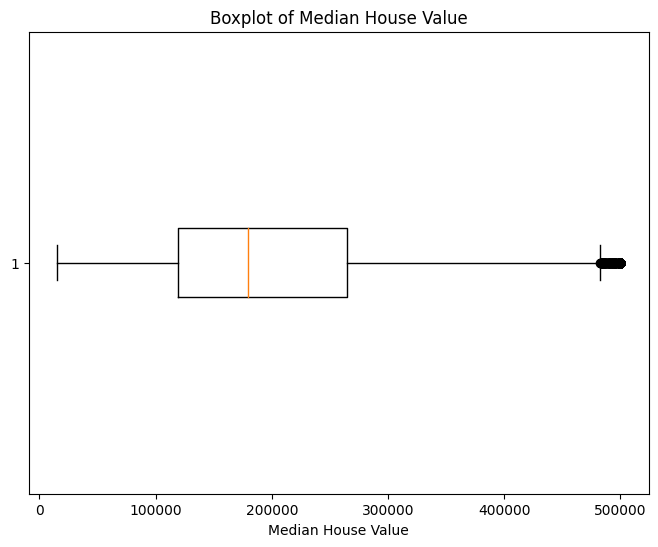

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(data['median_house_value'], vert=False)
plt.xlabel('Median House Value')
plt.title('Boxplot of Median House Value')
plt.show()

Этот боксплот показывает, что большинство стоимостей домов находятся в диапазоне между 150,000 и 250,000, с медианой около 200,000.

**Связь между доходом и стоимостью жилья:**


*   Построим диаграмму рассеяния для выявления зависимостей между доходом и стоимостью жилья.

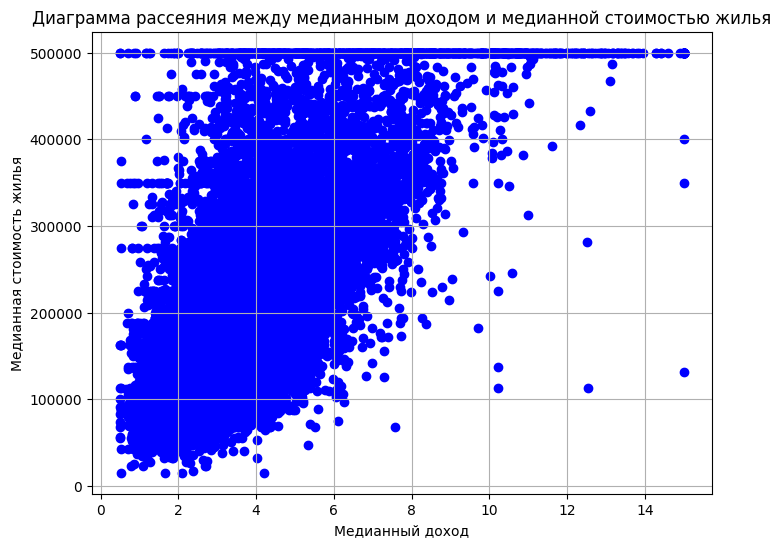

In [ ]:
# Построение диаграммы рассеяния
plt.figure(figsize=(8, 6))
plt.scatter(data['median_income'], data['median_house_value'], color='blue')
plt.title('Диаграмма рассеяния между медианным доходом и медианной стоимостью жилья')
plt.xlabel('Медианный доход')
plt.ylabel('Медианная стоимость жилья')
plt.grid(True)
plt.show()

Из диаграммы видно, что существует некоторая положительная корреляция между медианным доходом и медианной стоимостью жилья: с ростом дохода в целом возрастает и стоимость жилья. Однако связь не является строго линейной, так как точки на графике достаточно широко рассеяны, особенно в разделе с более низким доходом. Большинство точек сосредоточено слева на диаграмме, что указывает на то, что большинство наблюдаемых значений медианного дохода находится в нижнем диапазоне шкалы доходов.

Точки, которые находятся в верхней части графика, показывают, что некоторые районы имеют очень высокую медианную стоимость жилья при средних уровнях доходов. И наоборот, существует несколько точек, где доходы выше, но стоимость жилья остается относительно низкой. Это может указывать на региональные различия в стоимости жилья, которые не всегда коррелируют с доходами.



**Географическое распределение жилья:**


*   Построим график, отображающий распределение точек по координатам (longitude, latitude) и окрасим их в соответствии с ценой жилья.
*   Проанализируем, есть ли какие-то закономерности в географическом распределении стоимости жилья.

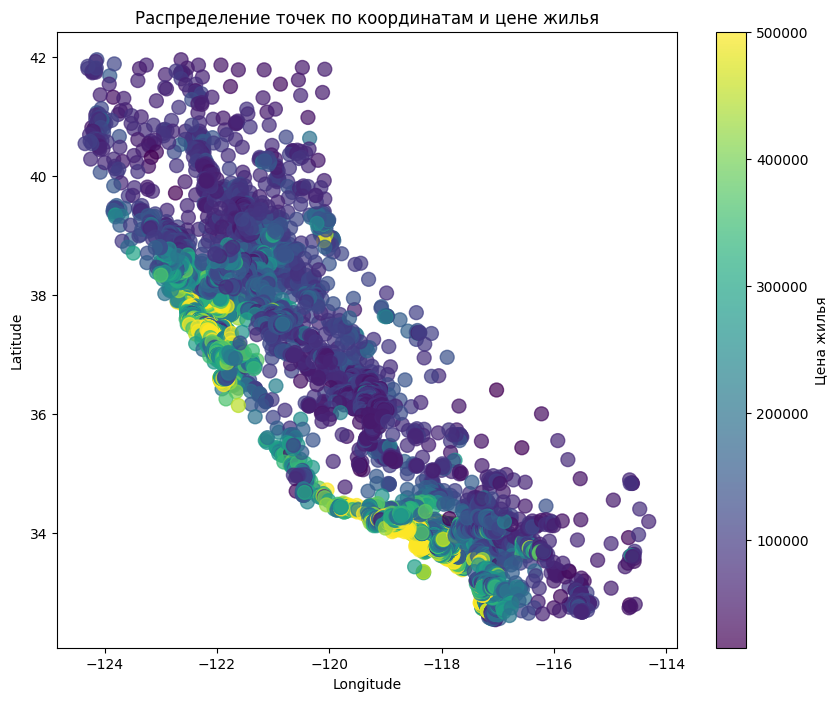

In [ ]:
# Создаем scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(data['longitude'], data['latitude'], c=data['median_house_value'], cmap='viridis', s=100, alpha=0.7)
plt.colorbar(scatter, label='Цена жилья')
plt.title('Распределение точек по координатам и цене жилья')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

По данной диаграмме можно сделать несколько выводов:

1. Концентрация точек показывает, где наибольшее количество наблюдений жилья, что как правило соответствует густонаселенным регионам.

2. Цвета точек показывают стоимость жилья: чем цвет теплее (от зеленого к желтому), тем выше цена. На графике видно, что в некоторых регионах (возможно крупных городах или побережье) цены на жилье выше, что указано желтым и зеленым цветами.

3. Также можно заметить, что цены на жилье ниже в менее населенных и удаленных районах, что подразумевается более холодными (синими и фиолетовыми) цветами.

**Возраст зданий и количество комнат:**
   - Исследуем зависимость между возрастом зданий (housing_median_age) и общим количеством комнат (total_rooms).
   - Построим график, отображающий эту зависимость.

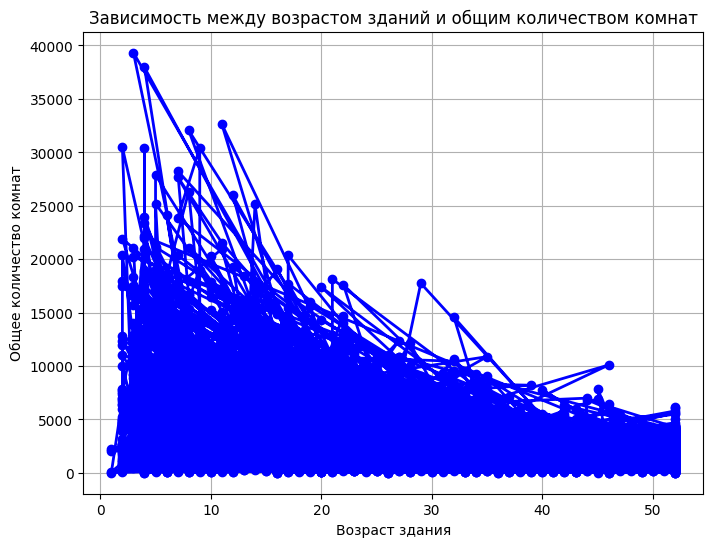

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(data['housing_median_age'], data['total_rooms'], marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Зависимость между возрастом зданий и общим количеством комнат')
plt.xlabel('Возраст здания')
plt.ylabel('Общее количество комнат')
plt.grid(True)

По такому графику тяжело что-либо понять, поэтому построим иной график.

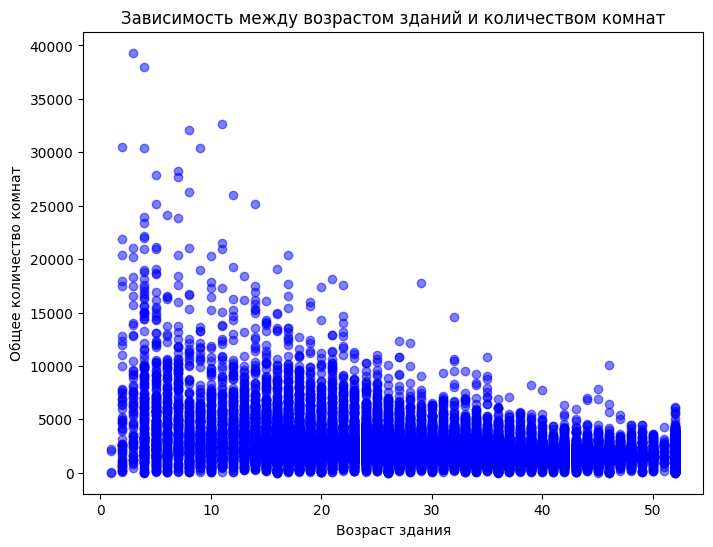

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['housing_median_age'], data['total_rooms'], color='blue', alpha=0.5)
plt.title('Зависимость между возрастом зданий и количеством комнат')
plt.xlabel('Возраст здания')
plt.ylabel('Общее количество комнат')
plt.show()

Из графика видно, что большее количество точек сосредоточено в районе меньшего возраста зданий, то есть многие здания являются относительно новыми. Кроме того, с увеличением возраста зданий наблюдается уменьшение концентрации точек, что может указывать на меньшее количество старых зданий с большим количеством комнат. Отдельно стоит отметить, что наличие большого числа значений с малым количеством комнат может быть связано с тем, что маленькие квартиры или дома являются более распространёнными вне зависимости от возраста зданий

**Плотность населения и количество спален:**
- Исследуем связь между плотностью населения (population) и количеством спален в доме (total_bedrooms).
- Построим соответствующий график

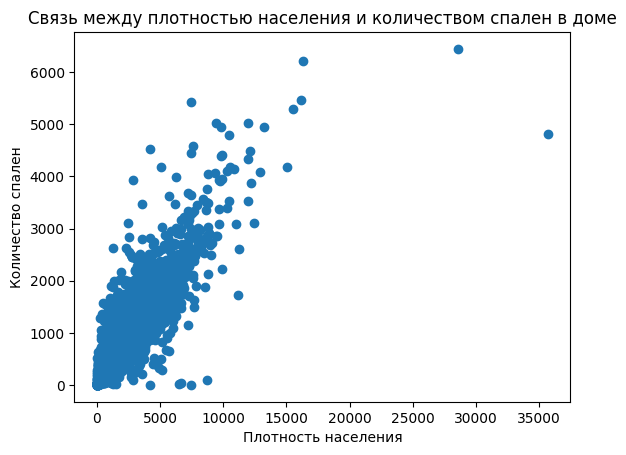

Коэффициент корреляции между плотностью населения и количеством спален: 0.8777467431529302


In [ ]:
plt.scatter(data['population'], data['total_bedrooms'])
plt.title('Связь между плотностью населения и количеством спален в доме')
plt.xlabel('Плотность населения')
plt.ylabel('Количество спален')
plt.show()

# Рассчет коэффициента корреляции Пирсона
correlation = data['population'].corr(data['total_bedrooms'])
print(f'Коэффициент корреляции между плотностью населения и количеством спален: {correlation}')

Матрица корреляции:
                population  total_bedrooms
population        1.000000        0.877747
total_bedrooms    0.877747        1.000000


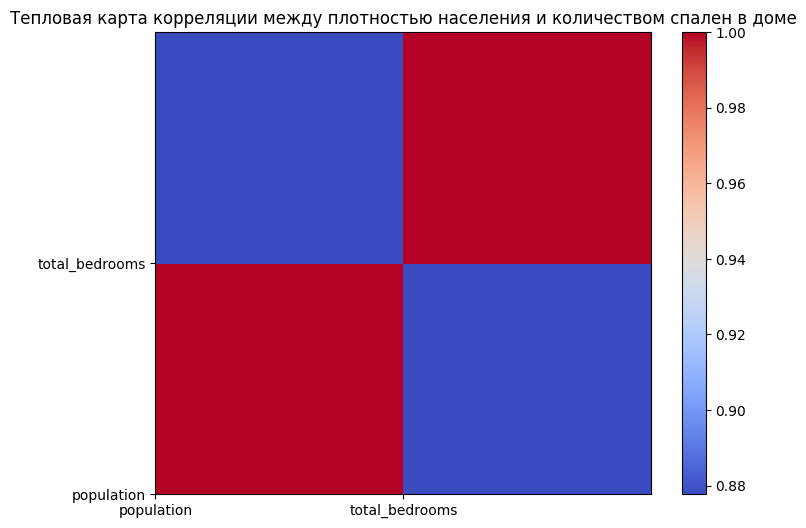

In [ ]:
# Рассчет матрицы корреляции
selected_data = data[['population', 'total_bedrooms']]
correlation_matrix = selected_data.corr()
print("Матрица корреляции:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
heatmap = plt.pcolor(correlation_matrix, cmap='coolwarm')
plt.colorbar(heatmap)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.yticks(range(len(correlation_matrix.index)), correlation_matrix.index)
plt.title('Тепловая карта корреляции между плотностью населения и количеством спален в доме')
plt.show()

В левом верхнем квадрате карты представлена корреляция переменной плотности населения с самой собой, а в правом нижнем квадрате — корреляция переменной количества спален с самой собой. В обоих случаях корреляция равна 1, что логично, ведь любая переменная всегда будет иметь идеальную корреляцию с самой собой.

В нижнем левом и верхнем правом квадратах отображена корреляция между плотностью населения и количеством спален в доме. Значение коэффициента корреляции в этих квадратах кажется одинаковым и составляет примерно 0.88 или чуть выше. Это указывает на высокую положительную корреляцию между этими двумя переменными, т.е. с увеличением значения одной переменной, скорее всего, будет увеличиваться и значение другой.

**Океанское расположение и стоимость жилья:**
- Проанализируем, как океанское расположение (ocean_proximity_numeric) влияет на
стоимость жилья.

<ipython-input-56-ad04ee0df763>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='median_house_value', y='ocean_proximity', inner='box', palette='Dark2')


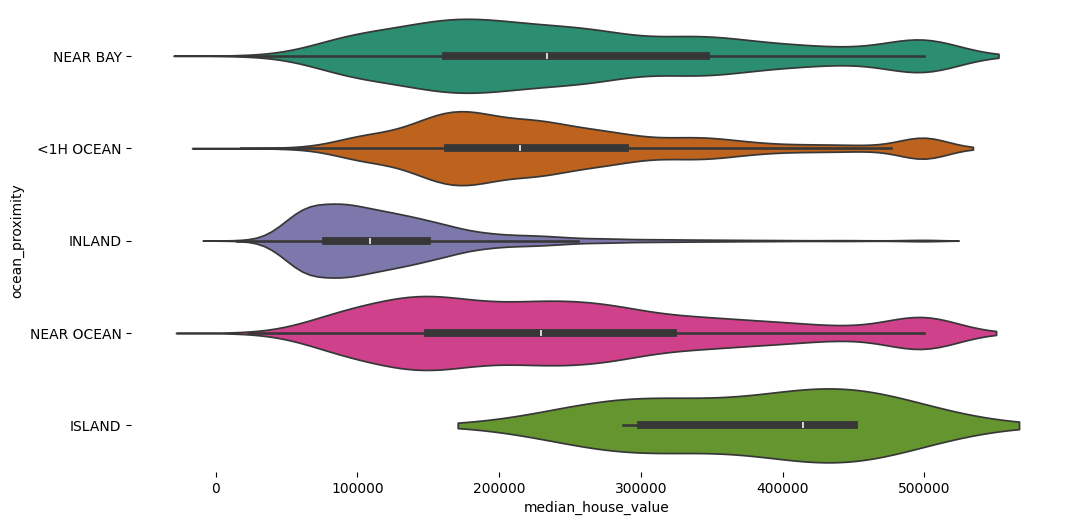

In [ ]:

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['ocean_proximity'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='median_house_value', y='ocean_proximity', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Категории океанского расположения соответствуют следующим обозначениям:
1. <1H OCEAN
2. INLAND
3. ISLAND
4. NEAR BAY
5. NEAR OCEAN

Исходя из графика, можно сделать следующие выводы:
1. Жильё, расположенное в категории "INLAND" (внутренние территории), имеет наименьшую среднюю стоимость по сравнению с другими категориями.
2. Жильё, относящееся к категории "ISLAND" (острова), демонстрирует самую высокую среднюю стоимость.
3. Жильё в категориях "NEAR BAY" (вблизи залива) и "<1H OCEAN" (менее часа до океана) также показывает более высокую среднюю стоимость по сравнению с жильём в категории "INLAND", но менее высокую, чем "ISLAND".
4. Стоимость жилья "NEAR OCEAN" (вблизи океана) чуть ниже, чем у "NEAR BAY" и "<1H OCEAN", но всё ещё значительно выше, чем у "INLAND".

Разделим датасет на целевой признак и остальные. В предположении, что целевой признак находится в столбце "median_house_value".

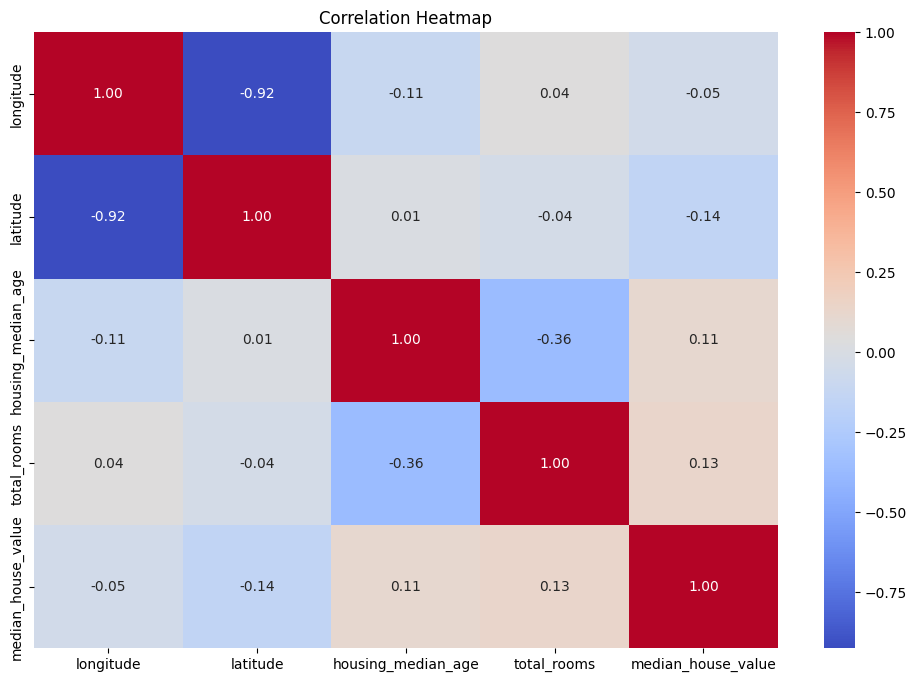

In [ ]:
# Выбор признаков для анализа
features = ['longitude','latitude','housing_median_age','total_rooms']  # Замените на реальные названия признаков

# Создание матрицы корреляции между признаками и целевым признаком
correlation_matrix = data[features + ['median_house_value']].corr()

# Построение тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


1. Долгота (longitude) и широта (latitude) имеют очень сильную отрицательную корреляцию (-0.92), что, скорее всего, отражает географическую зависимость между этими двумя признаками в определённом регионе данных.

2. Соотношение комнат (total_rooms) имеет небольшую отрицательную корреляцию с средним возрастом жилья (housing_median_age), что может указывать на то, что в более старых домах обычно меньше комнат.

3. Соотношение комнат (total_rooms) имеет слабую положительную корреляцию с медианной стоимостью жилья (median_house_value) (0.13), что может говорить о некоторой связи между большим количеством комнат и высокой стоимостью жилья.

4. Соотношение комнат (total_rooms) и широта (latitude), а также долгота (longitude) практически не имеют корреляции (-0.04 и 0.04 соответственно), что указывает на отсутствие прямой связи между этими показателями и количеством комнат.

5. Средняя стоимость дома (median_house_value) имеет слабую отрицательную корреляцию с широтой (-0.14) и очень слабую с долготой (-0.05), что может указывать на некоторую зависимость стоимости от географического местоположения, но эта связь не является сильной.

6. На карте также указаны значения 1.00 на диагонали, что означает полную корреляцию переменной с самой собой (как это всегда происходит).